# Оценка результатов А/В-теста

Вы — аналитик крупного интернет-магазина. Вместе с отделом маркетинга вы подготовили список гипотез для увеличения выручки.
Приоритизируйте гипотезы, запустите A/B-тест и проанализируйте результаты.

## Часть 1. Приоритизация гипотез.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import numpy as np
import scipy.stats as stats

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')

In [3]:
display(hypothesis.style.set_properties(**{'text-align': 'left'}))
hypothesis.info()

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Efforts     9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 488.0+ bytes


### 1.1 Фреймворк ICE

In [4]:
hypothesis['ICE'] = round((hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts'],2)
display(hypothesis.sort_values(by = 'ICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00


Делаем расчёт ICE. Выявляем приоритетные задачи - 8, 0 и 7.

### 1.2 Фреймворк RICE

In [5]:
hypothesis['RICE'] = (hypothesis['Reach']*hypothesis['Impact']*hypothesis['Confidence'])/hypothesis['Efforts']
display(hypothesis.sort_values(by = 'RICE', ascending = False))

,Hypothesis,Reach,Impact,Confidence,Efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.20,112.0
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.33,40.0
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сок...",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине,...",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1,1.00,3.0


Делаем расчёт RICE. Выявляем приоритетные задачи - 7, 2, 0 и 6.

### 1.3 Вывод

Приоритизация гипотез изменилась из-за добавления нового фактора - Reach (скольких пользователей затронет изменение). Для задачи 8, имеющей лучший приоритет ICE, оценка методом RICE сильно уступает другим гипотезам, так как охват этой задачи оценивается всего в 1. 
У гипотезы 7 напротив, охват имеет наивысшую оценку - 10. Поэтому RICE у неё целых 112.

В итоге самые приритетные гипотезы, расчитанные методом RICE - 7,2,0 и 6.

## Часть 2. Анализ A/B-теста

In [6]:
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

In [7]:
display(orders.head())
orders.info()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [8]:
display(visitors.head())
visitors.info()

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


In [9]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visitors['date'] = visitors['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

print(orders[orders.duplicated()].count())
print(visitors[visitors.duplicated()].count())

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64
date        0
group       0
visitors    0
dtype: int64


In [10]:
datesGroups = orders[['date','group']].drop_duplicates()
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date' : 'max', 'group' : 'max', 'transactionId' : 'nunique', 'visitorId' : 'nunique', 'revenue' : 'sum'}), axis=1).sort_values(by=['date','group'])
visitorsAggregated = datesGroups.apply(lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
                                       .agg({'date' : 'max', 'group' : 'max', 'visitors' : 'sum'}), axis=1).sort_values(by=['date','group'])

cumulativeData = ordersAggregated.merge(visitorsAggregated, left_on=['date', 'group'], right_on=['date', 'group'])
cumulativeData.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']
print(cumulativeData['date'].min().date())
print(cumulativeData['date'].max().date())
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue', 'orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue', 'orders']]

2019-08-01
2019-08-31


### 2.1 Кумулятивная выручка по группам

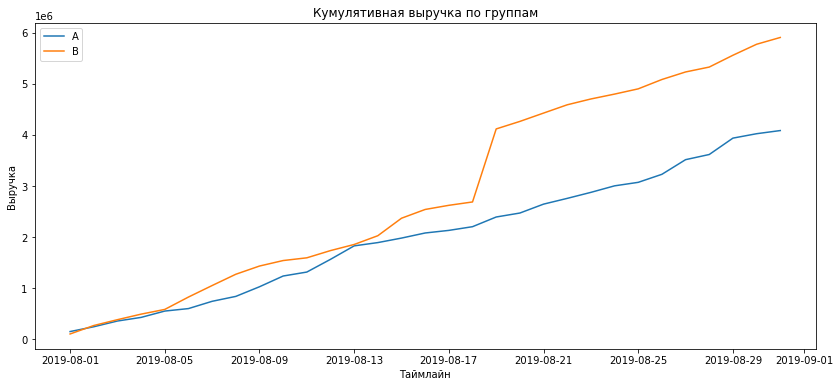

In [11]:
plt.figure(figsize=(14,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue'], label='B')
plt.title('Кумулятивная выручка по группам')
plt.xlabel('Таймлайн')
plt.ylabel('Выручка')
plt.legend()
plt.show()

Выручка почти равномерно увеличивалась до момента скачка в группе B в 18-19 числах. Это говорит о возможном всплеске числа заказов, либо о появлении очень дорогих заказов в выборке B.

### 2.2 Кумулятивный средний чек по группам

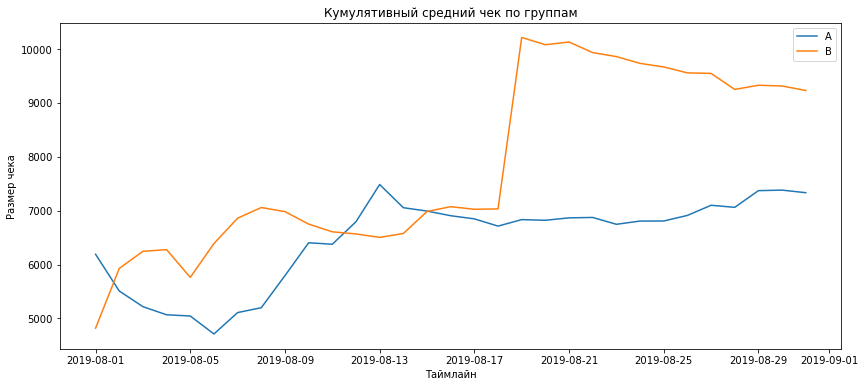

In [12]:
plt.figure(figsize=(14,6))
plt.plot(cumulativeRevenueA['date'], cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'], cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Кумулятивный средний чек по группам')
plt.xlabel('Таймлайн')
plt.ylabel('Размер чека')
plt.legend() 
plt.show()

График среднего чека для выборки B тоже совершает резкий скачок в 18-19 числах. После скачка в группе B средний чек для обоих выборок становится более равномерным: установился на уровне 7к для группы A и начал понемногу снижаться к 9к для группы B. 

### 2.3 Относительное изменение кумулятивного среднего чека группы B к группе A

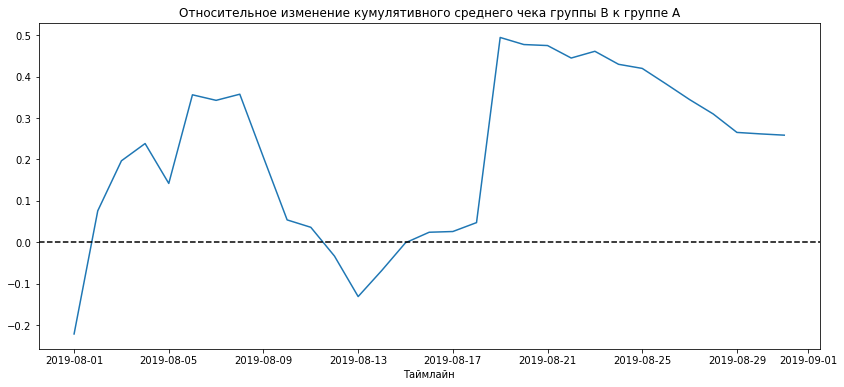

In [13]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB, left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(14,6))
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.xlabel('Таймлайн')
plt.show()

В нескольких точках, помимо упомянутой выше, график различия между группами резко «скачет». Вероятно это произошло из-за крупных заказов и выбросов.

### 2.4 Кумулятивная конверсия по группам

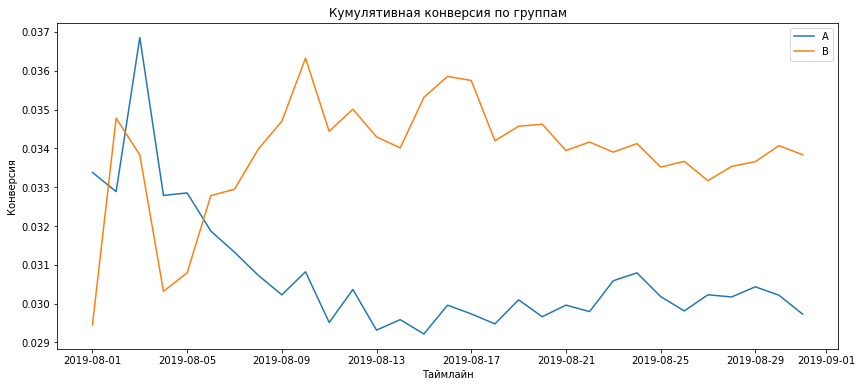

In [14]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visitors']
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.figure(figsize=(14,6))
plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Кумулятивная конверсия по группам')
plt.xlabel('Таймлайн')
plt.ylabel('Конверсия')
plt.legend()
plt.show()

Сначала конверсия группы A была выше конверсии группы B, но затем конверсия группы B вырвалась вперёд и зафиксировалась около значениий 0.034, а конверсия группы A просела и зафиксировалась около значениий 0.03. Видно, что различия в конверсиях групп минимальны.

### 2.5 Относительное изменение кумулятивной конверсии группы B к группе A

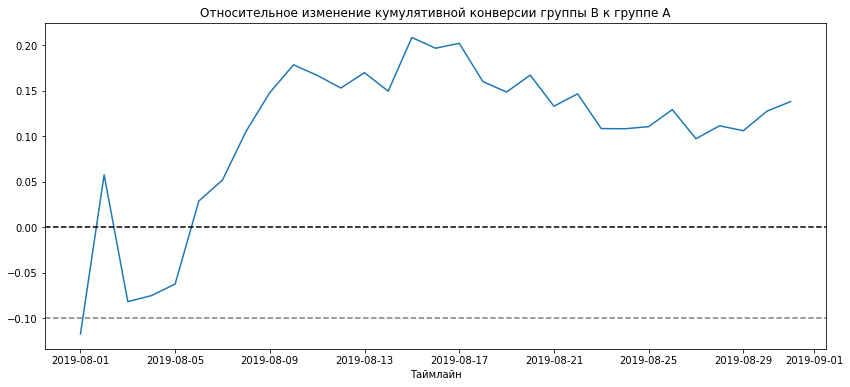

In [15]:
mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])
plt.figure(figsize=(14,6))
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=-0.1, color='grey', linestyle='--')
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.xlabel('Таймлайн')
plt.show()

В начале теста группа B немного проигрывала группе A, но затем вырвалась вперёд и росла с переменным успехом. Видна тенденция и к дальнейшему росту группы B.

Вцелом отношение конверсий двух групп примерно установилось, но перед тем как делать какие-либо окончательные выводы сперва  стоит проанализировать аномалии.

### 2.6 Количество заказов по пользователям

In [16]:
ordersByUsers = (orders.groupby('visitorId', as_index=False).agg({'transactionId': 'nunique'}))
ordersByUsers.columns = ['visitorId', 'orders']
print(ordersByUsers.sort_values(by='orders', ascending=False).head(10)) 

       visitorId  orders
1023  4256040402      11
591   2458001652      11
569   2378935119       9
487   2038680547       8
44     199603092       5
744   3062433592       5
55     237748145       5
917   3803269165       5
299   1230306981       5
897   3717692402       5


Есть пользователи, которые совершали 5, 8, 9 и 11 заказов. Значительно больше, чем обычный пользователь за неделю.

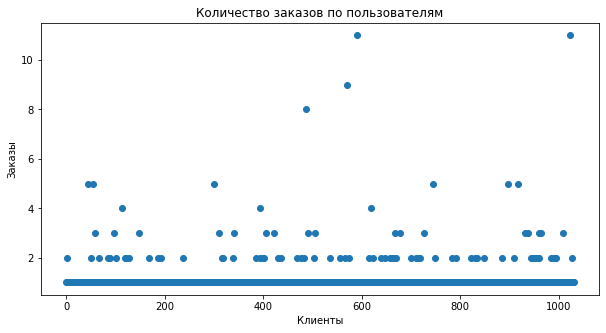

In [17]:
plt.figure(figsize=(10, 5))
plt.scatter(pd.Series(range(0,len(ordersByUsers))), ordersByUsers['orders']) 
plt.title('Количество заказов по пользователям')
plt.xlabel('Клиенты')
plt.ylabel('Заказы')
plt.show()

Много пользователей с 2-5 заказами. Рассчитаем их долю через перцентили, чтобы понять, считать их аномалиями или нет.

### 2.7 Перцентили количества заказов на пользователя

In [18]:
print(np.percentile(ordersByUsers['orders'], [95, 99])) 

[2. 4.]


Не более 5% пользователей оформляли больше 2 заказов. И 1% пользователей заказывали 4 и более раза.

Выберем 3 заказа на одного пользователя за нижнюю границу числа заказов, и отсеем аномальных пользователей по ней.

### 2.8  Стоимость заказов

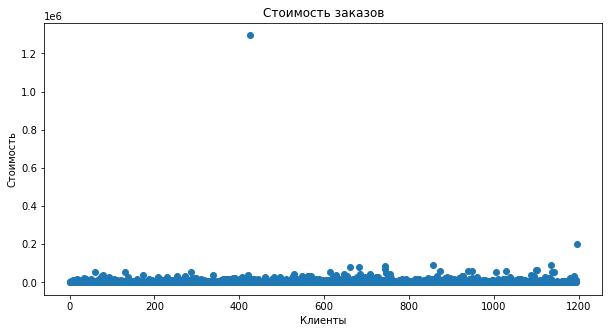

In [19]:
plt.figure(figsize=(10, 5))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue']) 
plt.title('Стоимость заказов')
plt.xlabel('Клиенты')
plt.ylabel('Стоимость')
plt.show()

Из-за сильного выброса сложно читать график. Давайте ограничим значения по оси Y. 

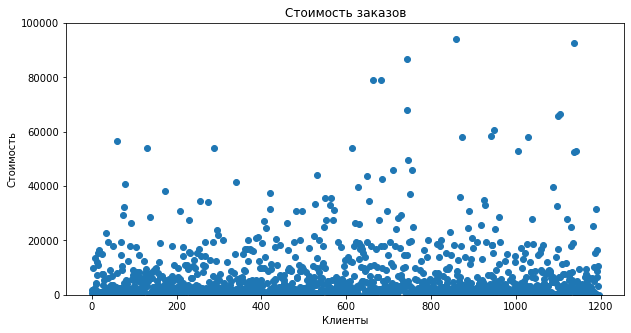

In [20]:
plt.figure(figsize=(10, 5))
plt.scatter(pd.Series(range(0,len(orders['revenue']))), orders['revenue']) 
plt.ylim(0, 100000)
plt.title('Стоимость заказов')
plt.xlabel('Клиенты')
plt.ylabel('Стоимость')
plt.show()

Как и предполагалось, есть дорогие заказы, превышающие 40000 рублей. Посмотрим, какова их доля через перцентили, чтобы понять, что считать аномалиями, а что нет.

### 2.9 Перцентили стоимости заказов

In [21]:
print(np.percentile(orders['revenue'], [95, 99])) 

[28000.  58233.2]


Не более 5% заказов дороже 28000 рублей и не более 1% дороже 58233 рублей. Примем 30000 за нижнюю границу стоимости заказов, и отсеем аномальных пользователей по ней.

### 2.10 Статистическая значимость различий в конверсии между группами по «сырым» данным

Для начала сформулируем гипотезы. 

Нулевая: различий в конверсии между группами нет. 

Альтернативная: различия в конверсии между группами есть.

Для проверки гипотез будем использовать A/B-тест.

In [22]:
visitorsADaily = visitors[visitors['group'] == 'A'][['date', 'visitors']]
visitorsADaily.columns = ['date', 'visitorsPerDateA']

visitorsBDaily = visitors[visitors['group'] == 'B'][['date', 'visitors']]
visitorsBDaily.columns = ['date', 'visitorsPerDateB']

ordersADaily = (
    orders[orders['group'] == 'A'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersADaily.columns = ['date', 'ordersPerDateA', 'revenuePerDateA']

ordersBDaily = (
    orders[orders['group'] == 'B'][['date', 'transactionId', 'visitorId', 'revenue']]
    .groupby('date', as_index=False)
    .agg({'transactionId': pd.Series.nunique, 'revenue': 'sum'}))
ordersBDaily.columns = ['date', 'ordersPerDateB', 'revenuePerDateB']

data = (ordersADaily.merge(ordersBDaily, left_on='date', right_on='date', how='left')
    .merge(visitorsADaily, left_on='date', right_on='date', how='left')
    .merge(visitorsBDaily, left_on='date', right_on='date', how='left'))

ordersByUsersA = (orders[orders['group'] == 'A'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = (orders[orders['group'] == 'B'].groupby('visitorId', as_index=False).agg({'transactionId': pd.Series.nunique}))
ordersByUsersB.columns = ['visitorId', 'orders']

sampleA = pd.concat([ordersByUsersA['orders'],
                     pd.Series(0, index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'], 
                     pd.Series(0, index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

In [23]:
alpha = 0.05
results = stats.mannwhitneyu(sampleA, sampleB)[1]
print('p-value:', "{0:.3f}".format(results)) 

if (results < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print("{0:.3f}".format(sampleB.mean() / sampleA.mean() - 1))

p-value: 0.017
Отвергаем нулевую гипотезу
0.138


По «сырым» данным различия в конверсии групп A и B есть.

p-value меньше 0.05, значит нулевую гипотезу о том, что статистически значимых различий в конверсии между группами нет отвергаем у принимаем альтернативную - различия в конверсии между группами есть.

Относительный выигрыш группы B равен 13.8%.

### 2.11 Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Теперь проверим статистическую значимость различий в среднем чеке между группами. Также сформулируем гипотезы.

Нулевая гипотеза: различий в среднем чеке между группами нет. 

Альтернативная гипотеза: различия в среднем чеке между группами есть.

Для проверки гипотез будем использовать A/B-тест.

In [24]:
alpha = 0.05
results = stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]
print('p-value:', "{0:.3f}".format(results)) 

if (results < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('{0:.3f}'.format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

p-value: 0.729
Не получилось отвергнуть нулевую гипотезу
0.259


p-value значительно больше 0.05. Следовательно, нулевую гипотезу не отвергаем - различий в среднем чеке между группами нет. 

Однако заметно, что средний чек группы B значительно выше среднего чека группы A, на целых 25,9%. Возможно это связано с аномалиями. Посмотрим какой результат получится, когда мы отбросим аномалии

### 2.12 Статистическая значимость различий в конверсии между группами по «очищенным» данным

95-й и 99-й перцентили средних чеков равны 28000 и 58233 рублям. А 95-й и 99-й перцентили количества заказов на одного пользователя равны 2 и 4 заказа на пользователя.

За аномальных пользователей примем тех, кто совершил от 3 заказов или совершил заказ дороже 30000 рублей. Таким образом мы уберём 5% пользователей с наибольшим числом заказов и 5% пользователей с дорогими заказами.

In [25]:
usersWithManyOrders = pd.concat(
    [
        ordersByUsersA[ordersByUsersA['orders'] > 3]['visitorId'],
        ordersByUsersB[ordersByUsersB['orders'] > 3]['visitorId'],
    ],
    axis=0)
usersWithExpensiveOrders = orders[orders['revenue'] > 30000]['visitorId']
abnormalUsers = (
    pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis=0)
    .drop_duplicates()
    .sort_values()
)
print(abnormalUsers.head(5))
print(abnormalUsers.shape[0]) 

1099    148427295
18      199603092
928     204675465
23      237748145
684     358944393
Name: visitorId, dtype: int64
57


Всего 57 аномальных пользователей. Проверим как их действия повлияли на результаты теста. Посчитаем статистическая значимость различий в конверсии между группами по «очищенным» данным. Но прежде сформулируем гипотезы.

Нулевая: различий в конверсии между группами по «очищенным» данным нет.

Альтернативная: различия в конверсии между группами по «очищенным» данным есть.

Для проверки гипотез будем использовать A/B-тест.

In [26]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],
                             pd.Series(0,index=np.arange(data['visitorsPerDateA'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'], 
                             pd.Series(0,index=np.arange(data['visitorsPerDateB'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

alpha = 0.05
results = stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]
print('p-value:', "{0:.3f}".format(results)) 

if (results < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print('{0:.3f}'.format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

p-value: 0.018
Отвергаем нулевую гипотезу
0.148


Результаты по конверсии практически не изменились. Даже по «очищенным» данным различия в конверсии групп A и B имеются. Что говорит о том, что статистически значимые различия по конверсии между группами есть и по «сырым» данным, и по данным после фильтрации аномалий.

Относительный выигрыш группы B составляет 14.8%. Это говорит о том, что значительный отрыв был получен без помощи аномальных пользователей.

### 2.13 Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Теперь проверим статистическую значимость различий в среднем чеке между группами по «очищенным» данным. Также прежде сформулируем гипотезы.

Нулевая гипотеза: различий в среднем чеке между группами по «очищенным» данным нет.

Альтернативная гипотеза: различия в среднем чеке между группами по «очищенным» данным есть.

Для проверки гипотез будем использовать A/B-тест.

In [27]:
alpha = 0.05
results = stats.mannwhitneyu(orders[
                np.logical_and(orders['group'] == 'A',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],
            orders[np.logical_and(orders['group'] == 'B',
                    np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'],)[1]
print('p-value:', "{0:.3f}".format(results)) 

if (results < alpha): 
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

print("{0:.3f}".format(orders[
            np.logical_and(orders['group'] == 'B',np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]
                       ['revenue'].mean()/ orders[np.logical_and(orders['group'] == 'A',
                np.logical_not(orders['visitorId'].isin(abnormalUsers)),)]['revenue'].mean()- 1)) 

p-value: 0.958
Не получилось отвергнуть нулевую гипотезу
-0.020


Результаты по конверсии практически не изменились. p-value стал ещё больше 0.05. Что говорит о том, что нет статистически значимого различия по конверсии в среднем чеке заказа между группами ни по «сырым» данным, ни по данным после фильтрации аномалий.

Однако средний чек группы B был выше среднего чека группы A на 26%, а теперь они практически равны, что говорит о том, что этот отрыв был получен благодаря аномальным пользователям, после отброса которых средние чеки обоих групп сравнялись.

### 2.14 Итоговый вывод

- Статистически значимые различия по конверсии между группами есть и по «сырым» данным, и по данным после фильтрации аномалий.
 
- Статистически значимого различия по конверсии в среднем чеке заказа между группами ни по «сырым» данным, ни по данным после фильтрации аномалий не наблюдается.

- Относительный выигрыш группы B после фильтрации аномалий составляет ~15%.

- Средние чеки групп A и B стали практически равны после фильтрации аномалий.

Исходя их этих фактов следует остановить тест и признать его успешным.